In [ ]:
NameError: name 'model' is not defined


    Actual  Predicted
0        1          1
5        0          0
36       1          1
45       0          0
13       1          1


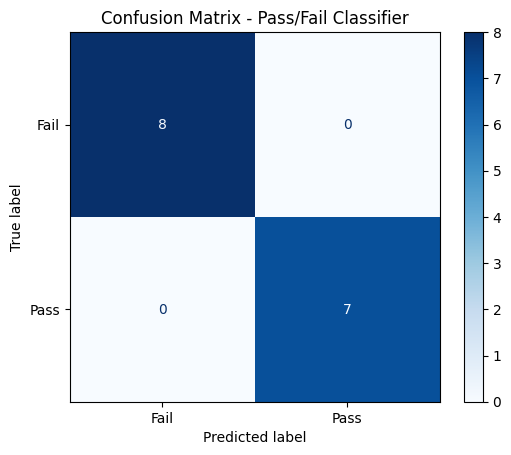

✅ Model Accuracy: 100.00%
Predicted Result: Pass


In [10]:
# ✅ STEP 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# ✅ STEP 2: Load dataset
data = {
    'Hours_Studied': [4.85,3.68,4.61,2.09,9.83,4.66,6.12,4.09,8.1,4.7,4.23,4.6,3.72,7.98,9.34,3.93,9.58,1.13,5.8,3.74,8.95,3.26,7.1,8.29,4.89,7.77,8.47,4.41,1.87,3.31,6.33,5.29,5.39,5.13,5.72,4.98,8.67,4.9,8.44,5.58,1.78,6.94,2.86,8.63,7.13,2.61,1.63,1.09,9.03,2.2,8.01,9.33,7.44,5.42,5.23,8.94,5.4,4.73,2.57,5.28],
    'Attendance': [95,91,54,79,77,67,85,52,70,95,65,86,91,54,99,63,80,95,73,84,85,59,76,76,72,62,65,84,76,88,96,66,97,90,50,60,61,63,57,80,56,95,80,65,91,88,93,68,57,78,51,91,52,78,64,87,77,86,81,79],
    'Final_Score': [50.83,39.52,43.66,30.05,59.61,31.69,60.43,33.96,58.81,59.68,30.79,42.03,42.08,55.26,74.19,35.47,69.49,33.07,43.98,36.65,70.66,26.22,47.62,60.09,43.81,73.95,54.52,53.91,37.75,32.78,65.37,35.72,33.7,56.47,28.41,45.51,54.44,55.7,66.16,47.16,19.84,52.1,34.2,58.68,58.61,40.18,40.35,28.43,54.33,22.46,64.66,66.57,46.09,45.25,29.56,65.19,45.18,53.47,42.22,49.07],
    'Result': ['Pass','Fail','Fail','Fail','Pass','Fail','Pass','Fail','Pass','Pass','Fail','Fail','Fail','Pass','Pass','Fail','Pass','Fail','Fail','Fail','Pass','Fail','Fail','Pass','Fail','Pass','Pass','Pass','Fail','Fail','Pass','Fail','Fail','Pass','Fail','Fail','Pass','Pass','Pass','Fail','Fail','Pass','Fail','Pass','Pass','Fail','Fail','Fail','Pass','Fail','Pass','Pass','Fail','Fail','Fail','Pass','Fail','Pass','Fail','Fail']
}
df = pd.DataFrame(data)

# ✅ STEP 3: Encode labels (Pass=1, Fail=0)
df['Result'] = df['Result'].map({'Pass': 1, 'Fail': 0})

# ✅ STEP 4: Split data
X = df[['Hours_Studied', 'Attendance', 'Final_Score']]
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ✅ STEP 5: Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# ✅ STEP 6: Make predictions
y_pred = model.predict(X_test)

# ✅ STEP 7: Show results
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_df.head())

# ✅ STEP 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Pass/Fail Classifier")
plt.show()

# ✅ STEP 9: Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy*100:.2f}%")

# ✅ STEP 10: Predict for new data
new_data = pd.DataFrame({'Hours_Studied':[6.5], 'Attendance':[88], 'Final_Score':[55]})
prediction = model.predict(new_data)
print("Predicted Result:", "Pass" if prediction[0]==1 else "Fail")
